In [35]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
print(cv2.__version__)

4.5.5


In [37]:
def plot_images(img1, img2, title1="", title2=""):  # function for plot img  side by side pic
    fig = plt.figure(figsize=[15,15])
    access1 =fig.add_subplot(121) 
    access1.imshow(img1, cmap="gray")
    access1.set(xticks=[], yticks=[], title=title1)
    
    access2=fig.add_subplot(122)
    access2.imshow(img2, cmap="gray")
    access2.set(xticks=[], yticks=[], title=title2)

In [123]:
path = "./images/car1.jpeg"

In [124]:
image = cv2.imread(path)

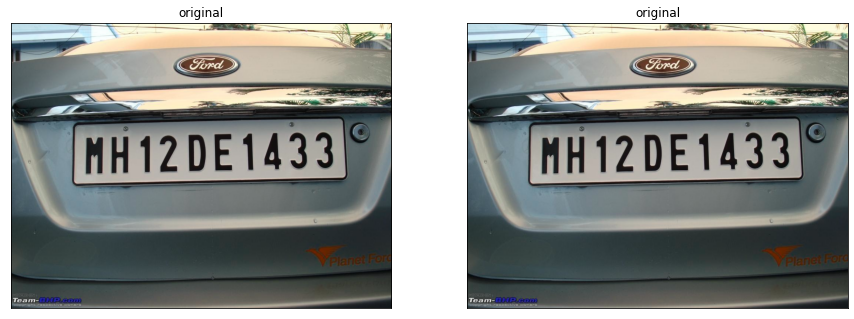

In [125]:
plot_images(image, image, title1="original", title2="original")

In [126]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #converted into gray scale image

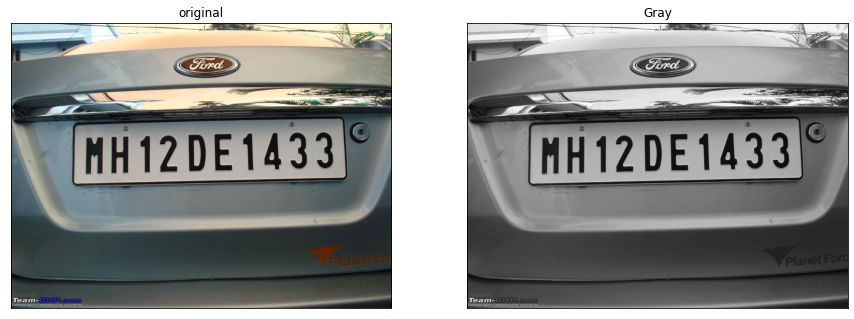

In [127]:
plot_images(image, gray, title1="original", title2="Gray")

In [128]:
blur = cv2.bilateralFilter(gray, 11, 90,90) #using bilateral filetr blured the edges

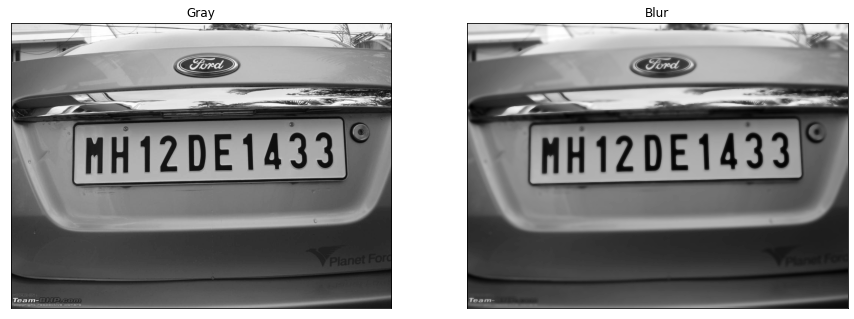

In [129]:
plot_images(gray, blur, title1="Gray", title2="Blur")

In [130]:
edges= cv2.Canny(blur, 30, 200)  #converted into edge detection

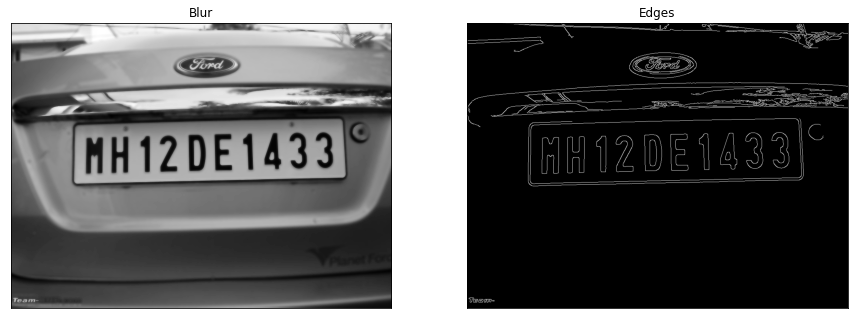

In [131]:
plot_images(blur, edges, title1="Blur", title2="Edges")

In [132]:
cnts, new =cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) #finding all contours

In [133]:
type(cnts)

tuple

In [134]:
print(cnts[0])

[[[ 68 749]]

 [[ 73 749]]]


In [135]:
image_copy = image.copy()

In [136]:
_ = cv2.drawContours(image_copy, cnts, -1, (255, 0, 255), 2) #draw the contour

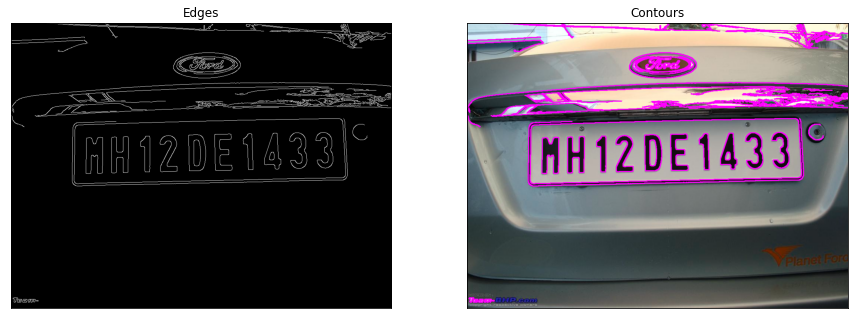

In [137]:
plot_images(edges,image_copy, title1="Edges", title2="Contours")

In [138]:
print(len(cnts))

189


In [139]:
cnts= sorted(cnts, key=cv2.contourArea, reverse=True)[:50] #selecting particular contours

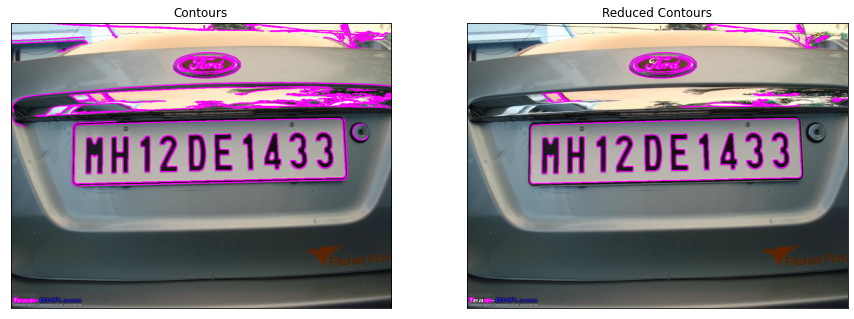

In [140]:
image_reduced_cnts = image.copy()
_ = cv2.drawContours(image_reduced_cnts, cnts, -1, (255, 0, 255), 2)
plot_images(image_copy,image_reduced_cnts, title1="Contours", title2="Reduced Contours")

In [141]:
print(len(cnts))

50


In [143]:
plate = None  
for c in cnts:
    perimeter = cv2.arcLength(c,True)
    edges_count = cv2.approxPolyDP(c, 0.01*perimeter, True) #approxpolydp is no.of sides
    print(len(edges_count))
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h,x:x+w]  # getting rectangular object
        break
        
cv2.imwrite("plate.png", plate)
        

4


True

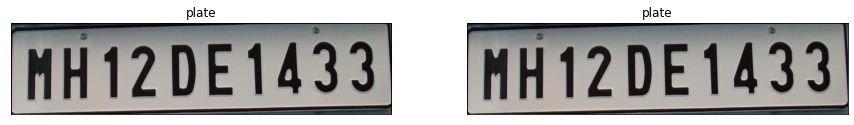

In [144]:
plot_images(plate,plate, title1="plate", title2="plate")

In [60]:
!pip install pytesseract

  Using cached pytesseract-0.3.9-py2.py3-none-any.whl (14 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4


In [145]:
import pytesseract
text = pytesseract.image_to_string(plate, lang ="eng") #extract the digites from the number plate
print(text)

MH12DE1433

